In [480]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Datset url: http://archive.ics.uci.edu/ml/datasets/Air+Quality#

## Regression Task: Predict 'Air Temperature' using levels of CO, C6H6, NMHC, NOx, NO2 and O3.

In [481]:
df_air = pd.read_csv('AirQualityUCI.csv')
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [482]:
# Removing date and time as it is irrelevant for our task, where we predict air temp given levels of emmissions.

df_air.drop(['Date', 'Time'], axis = 1, inplace = True)

In [483]:
df_air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [484]:
df_air.shape

(9357, 13)

In [485]:
df_air.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [486]:
df_air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [487]:
for col in df_air.columns:
    print('Range for ' + col + ' is: ', (df_air[col].min(),df_air[col].max()), '\n') 

Range for CO(GT) is:  (-200.0, 11.9) 

Range for PT08.S1(CO) is:  (-200, 2040) 

Range for NMHC(GT) is:  (-200, 1189) 

Range for C6H6(GT) is:  (-200.0, 63.7) 

Range for PT08.S2(NMHC) is:  (-200, 2214) 

Range for NOx(GT) is:  (-200, 1479) 

Range for PT08.S3(NOx) is:  (-200, 2683) 

Range for NO2(GT) is:  (-200, 340) 

Range for PT08.S4(NO2) is:  (-200, 2775) 

Range for PT08.S5(O3) is:  (-200, 2523) 

Range for T is:  (-200.0, 44.6) 

Range for RH is:  (-200.0, 88.7) 

Range for AH is:  (-200.0, 2.231) 



In [488]:
# A lot of -200 values in all features which seem to be malfunction, -200 C air temperature doesn't make sense
# Replaced these values by NaN first

df_air.replace(to_replace= -200, value= np.NaN, inplace= True)

In [489]:
# A lot of missing values fro NMHC (8443)

df_air.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [490]:
# Dropped feature NMHC(GT)

df_air.drop(['NMHC(GT)'], axis=1, inplace = True)

In [491]:
# Replaced NaN values by median values of the features

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
air_quality = pd.DataFrame(imputer.fit_transform(df_air))
air_quality.columns = df_air.columns

## Statistical summary for the dataset

In [492]:
air_quality.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.089302,1098.392433,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352
std,1.323024,212.911465,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [493]:
# checking if any missing value

air_quality.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [494]:
for col in air_quality.columns:
    print('Range for ' + col + ' is: ', (air_quality[col].min(),air_quality[col].max()), '\n') 

Range for CO(GT) is:  (0.1, 11.9) 

Range for PT08.S1(CO) is:  (647.0, 2040.0) 

Range for C6H6(GT) is:  (0.1, 63.7) 

Range for PT08.S2(NMHC) is:  (383.0, 2214.0) 

Range for NOx(GT) is:  (2.0, 1479.0) 

Range for PT08.S3(NOx) is:  (322.0, 2683.0) 

Range for NO2(GT) is:  (2.0, 340.0) 

Range for PT08.S4(NO2) is:  (551.0, 2775.0) 

Range for PT08.S5(O3) is:  (221.0, 2523.0) 

Range for T is:  (-1.9, 44.6) 

Range for RH is:  (9.2, 88.7) 

Range for AH is:  (0.1847, 2.231) 



In [495]:
quality_dummy = air_quality.pop('T')
air_quality['Temperature(C)'] = quality_dummy
air_quality.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Temperature(C)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,13.6
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,13.3
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,11.9
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,11.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,11.2


## Histograms for the features

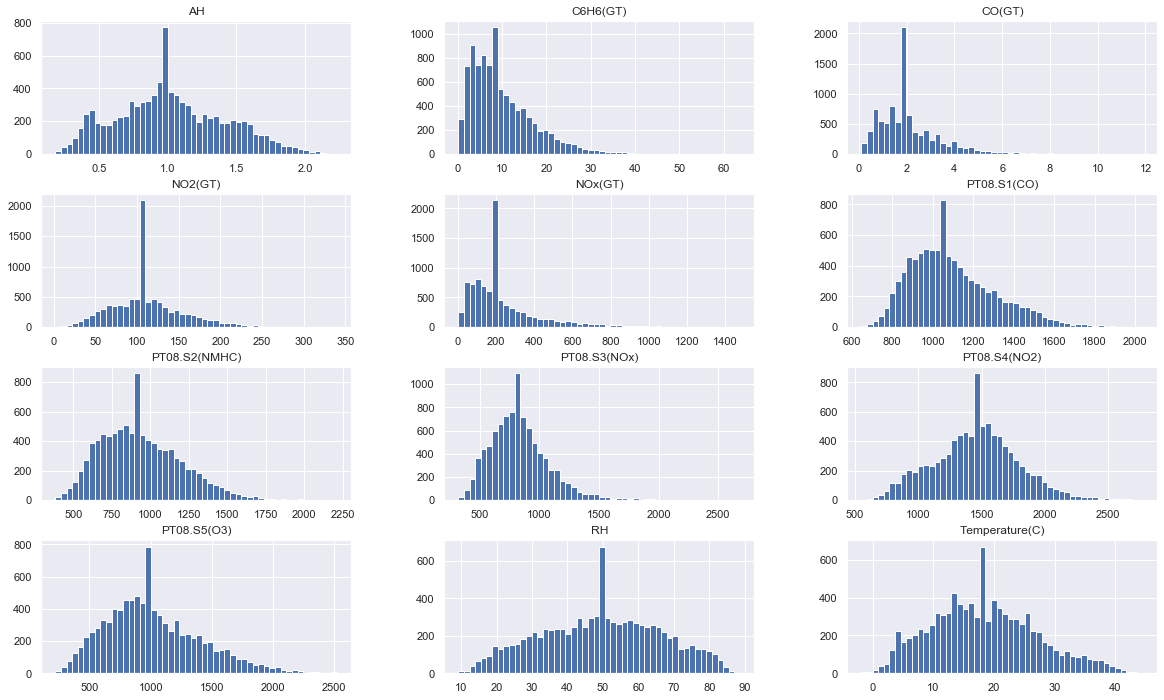

In [496]:
#checking distribution for all the numerical features

%matplotlib inline
air_quality.hist(bins=50,figsize=(20,12))
plt.show()

## Checking for correlation between Temperature and available features

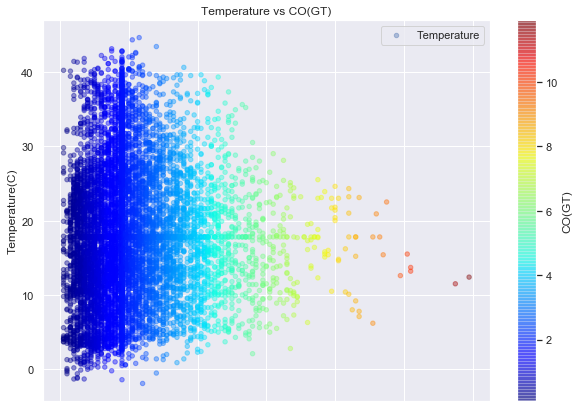

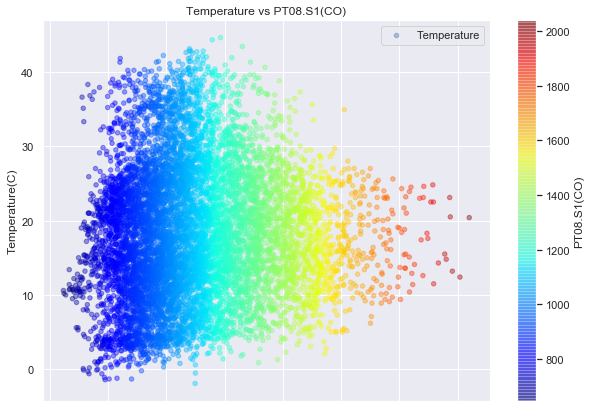

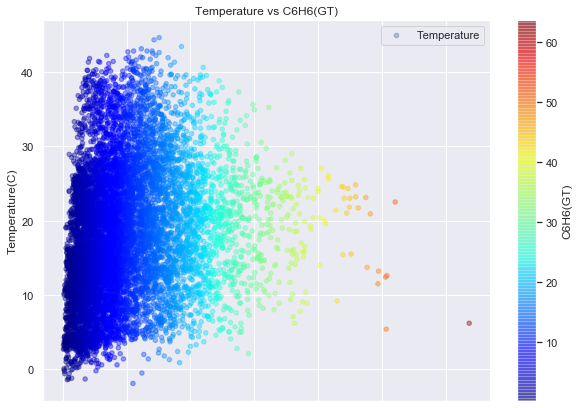

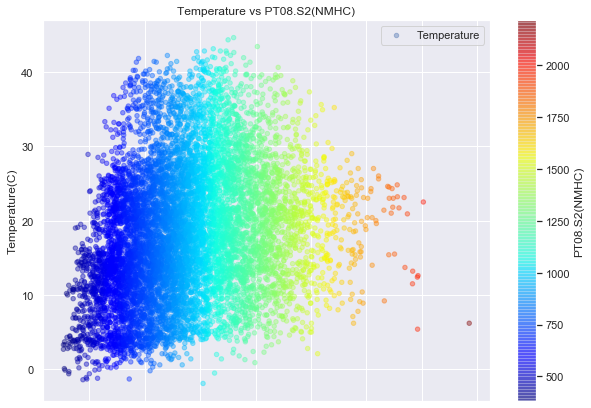

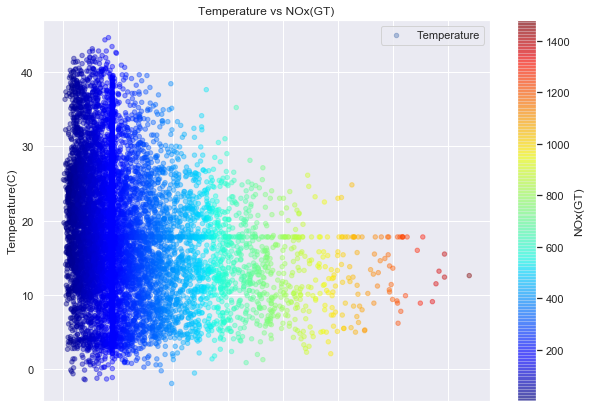

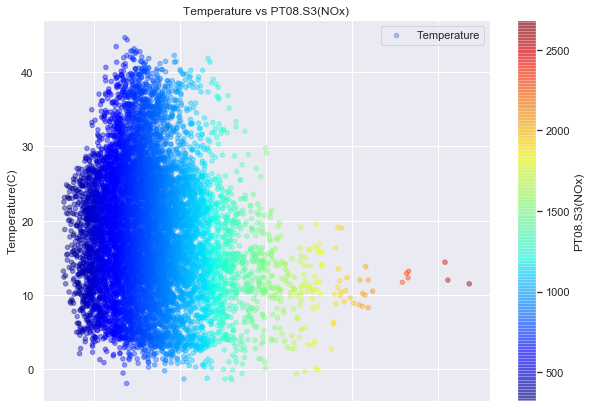

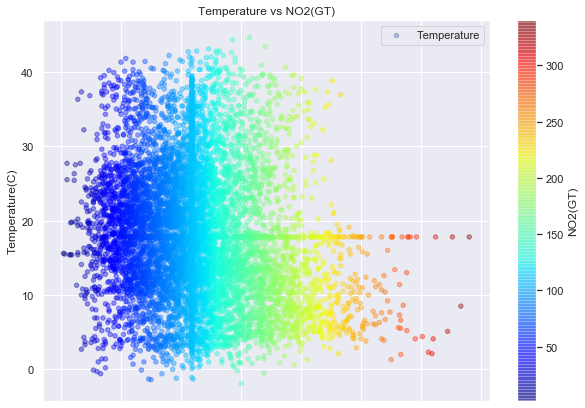

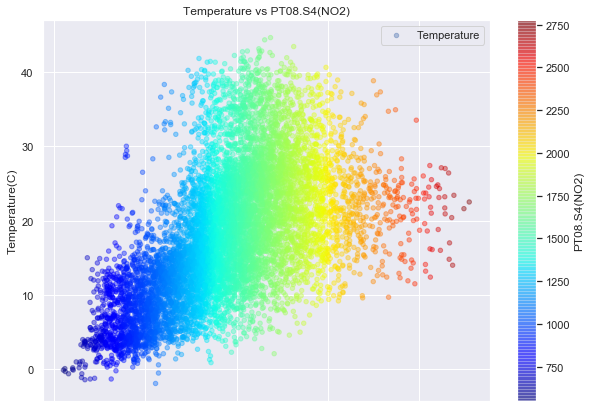

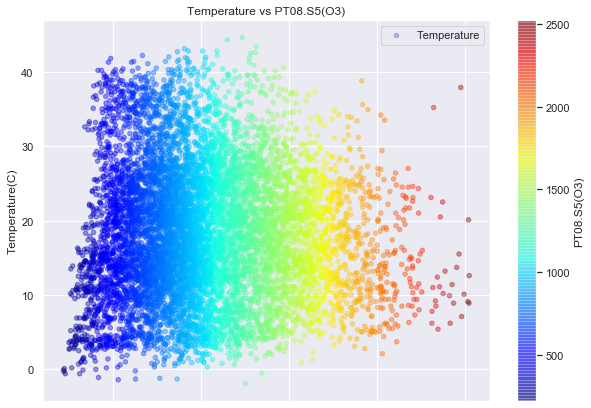

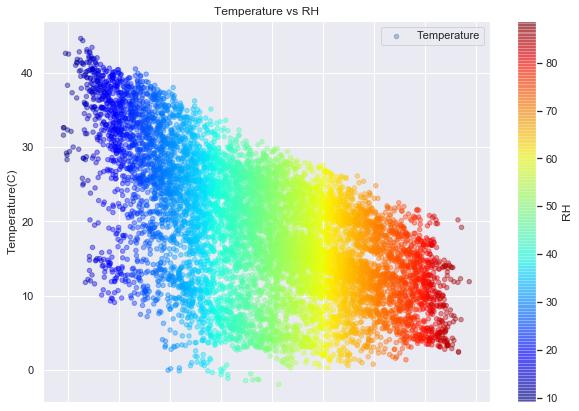

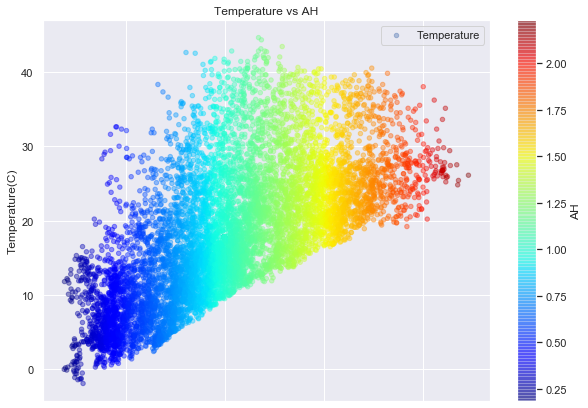

In [497]:
for col in air_quality.columns.drop(['Temperature(C)']):
    air_quality.plot(kind='scatter', x= col, y='Temperature(C)', alpha=0.4, label='Temperature'
                 , c = col,figsize = (10,7),cmap = plt.get_cmap('jet'), colorbar=True)
    plt.title('Temperature vs ' + col)

In [498]:
# Using standard scaler to check for correlation values

std_scaler = StandardScaler()
quality_prepared = pd.DataFrame(std_scaler.fit_transform(air_quality))
quality_prepared.columns = air_quality.columns
quality_prepared.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Temperature(C)
0,0.386029,1.228781,0.258577,0.412925,-0.354617,0.880318,0.014261,0.693887,0.633214,-0.020532,-0.673353,-0.542585
1,-0.067502,0.909382,-0.083356,0.065082,-0.677560,1.348952,-0.463597,0.301964,-0.124277,-0.091228,-0.754948,-0.577236
2,0.083675,1.426057,-0.138065,0.003922,-0.534030,1.213922,0.037016,0.290176,0.136750,0.279927,-0.692552,-0.738941
3,0.083675,1.303934,-0.110711,0.038324,-0.323861,1.023291,0.219057,0.375633,0.466873,0.633408,-0.600347,-0.842894
4,-0.369856,0.815441,-0.479998,-0.389791,-0.534030,1.472068,0.082526,0.098635,0.228878,0.609842,-0.595042,-0.819793


(12.0, 0.0)

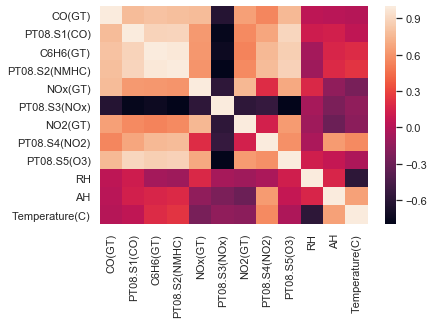

In [499]:
corr_matrix = quality_prepared.corr()
sns.set()
ax = sns.heatmap(corr_matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [500]:
corr_matrix['Temperature(C)'].sort_values(ascending=False)

Temperature(C)    1.000000
AH                0.656452
PT08.S4(NO2)      0.561183
PT08.S2(NMHC)     0.241556
C6H6(GT)          0.199273
PT08.S1(CO)       0.048985
CO(GT)            0.006049
PT08.S5(O3)      -0.026814
PT08.S3(NOx)     -0.144802
NO2(GT)          -0.169380
NOx(GT)          -0.245708
RH               -0.578625
Name: Temperature(C), dtype: float64

In [501]:
# Based on confirmation between plots above and correlation values we select these features

quality_final = quality_prepared.drop(['C6H6(GT)','PT08.S1(CO)','CO(GT)','PT08.S5(O3)','PT08.S3(NOx)',
                                       'NO2(GT)'],axis=1)
quality_final.head()

,PT08.S2(NMHC),NOx(GT),PT08.S4(NO2),RH,AH,Temperature(C)
0,0.412925,-0.354617,0.693887,-0.020532,-0.673353,-0.542585
1,0.065082,-0.677560,0.301964,-0.091228,-0.754948,-0.577236
2,0.003922,-0.534030,0.290176,0.279927,-0.692552,-0.738941
3,0.038324,-0.323861,0.375633,0.633408,-0.600347,-0.842894
4,-0.389791,-0.534030,0.098635,0.609842,-0.595042,-0.819793


## Creating train, validation, and test data sets

In [519]:
train_set, test_set = train_test_split(quality_final, test_size = 0.2, random_state = 42)
X_train = train_set.drop(['Temperature(C)'],axis=1).to_numpy()
y_train = train_set['Temperature(C)'].to_numpy()
X_test = test_set.drop(['Temperature(C)'],axis=1).to_numpy()
y_test = test_set['Temperature(C)'].to_numpy()
X_valid, X_train = X_train[:2000], X_train[2000:]
y_valid, y_train = y_train[:2000], y_train[2000:]

## Training the DNN Regressor model

In [503]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[5])]

dnn_reg = tf.estimator.DNNRegressor(hidden_units=[150,100,100],
                                     feature_columns=feature_cols)

train_input_func = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

dnn_reg.train(input_fn=train_input_func)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VISHAL~1\\AppData\\Local\\Temp\\tmpe3mok2eb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000225CE150EC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

## Validating DNN Regressor model fitted

In [504]:
valid_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_valid}, y=y_valid, shuffle=False)
valid_eval_results = dnn_reg.evaluate(input_fn=valid_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-19T23:08:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-19-23:08:26
INFO:tensorflow:Saving dict for global step 4388: average_loss = 0.00037482026, global_step = 4388, label/mean = -0.0075797928, loss = 0.046852533, prediction/mean = -0.010911772
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4388: C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388


In [505]:
valid_eval_results

{'average_loss': 0.00037482026,
 'label/mean': -0.0075797928,
 'loss': 0.046852533,
 'prediction/mean': -0.010911772,
 'global_step': 4388}

## Testing the fitted model on test dataset

In [506]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
test_eval_results = dnn_reg.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-19T23:08:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-19-23:08:27
INFO:tensorflow:Saving dict for global step 4388: average_loss = 0.00030608327, global_step = 4388, label/mean = 0.023097055, loss = 0.03819919, prediction/mean = 0.019819368
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4388: C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388


In [507]:
test_eval_results

{'average_loss': 0.00030608327,
 'label/mean': 0.023097055,
 'loss': 0.03819919,
 'prediction/mean': 0.019819368,
 'global_step': 4388}

## Comparing predictions to actual labels

In [508]:
y_pred_iter = dnn_reg.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]
print('*************************************************\n')
print('Prediction: ', y_pred[0], '\nLabel: ', y_test[0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
*************************************************

Prediction:  {'predictions': array([0.8829049], dtype=float32)} 
Label:  0.8896558794685994


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VISHAL~1\AppData\Local\Temp\tmpe3mok2eb\model.ckpt-4388
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

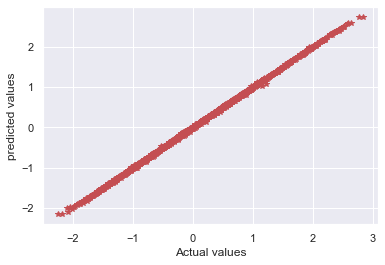

In [509]:
predictions=[]
for pred in dnn_reg.predict(input_fn=test_input_fn):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')